# **Drugs Repositioning K-means**

### Part 1: **Exploratory Analysis** (Unsupervised):
We will use K-Means clustering to discover natural groups and hidden patterns within drug-disease associations, thereby generating hypotheses.

![K-Means](https://github.com/VicDc/Drugs-Repositioning/blob/6a325228eb1a7957ccd98d26d5e2398f51a81dda/img_Drugs/1750604649726.jpg)

### **Theoretical Context**
Before diving into the code, it's essential to understand the context. Previous sections of our document explained:

The Challenges of Drug Discovery: This includes the high costs, lengthy timelines, and frequent failure rates.

Drug Repositioning: How this strategy helps to overcome these challenges.

The MiRAGE Method: An example of an advanced computational approach for predicting new drug-disease associations.

Our practical analysis will use a clustering technique (K-Means) to explore the intrinsic data structure and identify groups of drug-disease associations based on their textual similarity..

### **Practical Analysis - SETUP**
Cell 1: Importing Necessary Libraries
Description:
As the first step in any data analysis project, we import all the Python libraries we'll need. Each library has a specific role:
`pandas`: Fundamental for manipulating tabular data (our DataFrames). We will use it to read, clean, and merge CSV files.

`scikit-learn (sklearn)`: The toolkit for machine learning. We will use its modules for text vectorization (TfidfVectorizer), dimensionality reduction `(PCA)`, and the clustering algorithm `(KMeans)`.

`matplotlib`:  The go-to library for creating static graphs and visualizations. It will be essential for visualizing our clustering results and the "elbow" plot.

`numpy`: Useful for efficient numerical operations, especially with the arrays produced by machine learning libraries.

In [ ]:
# --- Step 0: Importing Necessary Libraries ---
# In this cell, we import all the tools we'll need for our analysis.

# Pandas is the go-to library in Python for manipulating tabular data (like our CSV files). 
# We'll use it to read, clean, and merge the data.
import pandas as pd

# Scikit-learn (sklearn) is the main library for machine learning in Python. 
# From it, we'll import:
#
# - TfidfVectorizer: to transform our text into numerical vectors.
# - KMeans: the clustering algorithm we'll use.
# - PCA: a tool for reducing the dimensionality of our data.
from sklearn.feature_extraction.text import TfidfVectorizer # Per la vettorizzazione del testo
from sklearn.cluster import KMeans  # Algoritmo di Clustering
from sklearn.decomposition import PCA # Per la riduzione della dimensionalità (Clustering)
from sklearn.model_selection import train_test_split       # Per dividere il dataset (Classificazione)
from sklearn.ensemble import RandomForestClassifier        # Algoritmo di Classificazione
from sklearn.metrics import classification_report, accuracy_score # Per valutare il classificatore

# Matplotlib è la libreria più usata per creare grafici e visualizzazioni in Python.
# Ci servirà per visualizzare i risultati del nostro clustering.
import matplotlib.pyplot as plt

# Numpy è una libreria fondamentale per il calcolo scientifico, specialmente per lavorare con array numerici.
import numpy as np

# 'display' è una funzione di IPython che formatta meglio l'output dei DataFrame rispetto a print.
from IPython.display import display

print("Librerie importate con successo.")


Librerie importate con successo.


### **1: Loading and Merging Data**

The goal of this cell is to load the three separate CSV files and combine them into one large DataFrame. This process is crucial because it allows us to have all the related information for each row: the association (from `mapping.csv`), drug details (from `drugsInfo.csv`), and disease details (from `diseasesInfo.csv)`. We use the `pd.merge` function (similar to a SQL JOIN) to link the data using the common columns DrugID and DiseaseID.

In [ ]:
# --- Step 1: Loading and Merging Data ---
# The goal of this step is to create a single, comprehensive DataFrame that contains 
# all available information for each known drug-disease association.

print("--- Inizio del caricamento e unione dei dati ---")
try:
    # Let's load the three CSV files into pandas DataFrames.
    drugs_df = pd.read_csv('drugsInfo.csv')
    diseases_df = pd.read_csv('diseasesInfo.csv')
    mapping_df = pd.read_csv('mapping.csv') # This file contains the links between DrugID and DiseaseID.

    # Now let's merge the DataFrames. 
    # We start with the mapping file.
    # and add the drug information, linking by 'DrugID'.
    merged_df = pd.merge(mapping_df, drugs_df, on='DrugID')
    # then we add the disease information, linking by 'DiseaseID'.
    merged_df = pd.merge(merged_df, diseases_df, on='DiseaseID')

    print("File caricati e uniti con successo.")
    print("Prime 5 righe del DataFrame unito:")
    display(merged_df.head())

except FileNotFoundError as e:
    print(f"\nERRORE: Impossibile trovare uno o più file CSV.\n Dettaglio errore: {e}")

--- Inizio del caricamento e unione dei dati ---
File caricati e uniti con successo.
Prime 5 righe del DataFrame unito:


,DrugID,DiseaseID,DrugName,DrugDescription,DrugTarget,DrugPharmacodynamics,DrugSmile,DrugMechanism,DrugConditions,DrugCategories,DiseaseName,DiseaseDescription,SlimMapping,PathwayNames
0,DB09140,MESH:D000013,Oxygen,Oxygenis an essential element for human surviv...,"['P00395', 'Q9Y5S8']",Oxygen therapy improves effective cellular oxy...,O=O,Oxygen therapy increases the arterial pressure...,[],"['Chalcogens', 'Elements', 'Gases', 'Medical G...",Congenital Abnormalities,Malformations of organs or body parts during d...,['Congenital abnormality'],Vesicle-mediated transport
1,DB00730,MESH:D000013,Thiabendazole,Thiabendazoleis a benzimidazole used in the tr...,['P00363'],Thiabendazole is a fungicide and parasiticide....,N1C2=CC=CC=C2N=C1C1=CSC=N1,The precise mode of action of thiabendazole on...,[],"['Anthelmintics', 'Anti-Infective Agents', 'An...",Congenital Abnormalities,Malformations of organs or body parts during d...,['Congenital abnormality'],Vesicle-mediated transport
2,DB00898,MESH:D000013,Ethanol,"A clear, colorless liquid rapidly absorbed fro...","['P14867', 'Q8TCU5', 'P23415', 'P23416', 'Q026...",Alcohol produces injury to cells by dehydratio...,CCO,Ethanol affects the brain’s neurons in several...,"['Hand Hygiene', 'Skin disinfection']","['Agents Causing Muscle Toxicity', 'Alcohols',...",Congenital Abnormalities,Malformations of organs or body parts during d...,['Congenital abnormality'],Vesicle-mediated transport
3,DB01168,MESH:D000013,Procarbazine,Procarbazineis an antineoplastic agent indicat...,"['P21397', 'P27338']",Procarbazine is an antineoplastic in the class...,CNNCC1=CC=C(C=C1)C(=O)NC(C)C,The precise mode of cytotoxic action of procar...,[],"['Acids, Carbocyclic', 'Agents Causing Muscle ...",Congenital Abnormalities,Malformations of organs or body parts during d...,['Congenital abnormality'],Vesicle-mediated transport
4,DB00550,MESH:D000013,Propylthiouracil,Propylthiouracilis a thiourea antithyroid agen...,['P07202'],Propylthiouracil is a thiourea antithyroid age...,CCCC1=CC(=O)NC(=S)N1,Propylthiouracil binds to thyroid peroxidase a...,[],"['Agents Causing Muscle Toxicity', 'Antimetabo...",Congenital Abnormalities,Malformations of organs or body parts during d...,['Congenital abnormality'],Vesicle-mediated transport


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('DrugID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('DrugName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('DrugDescription').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('DrugTarget').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DrugName'].value_counts()
    for x_label, grp in _df_4.groupby('DrugID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DrugID')
_ = plt.ylabel('DrugName')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DrugDescription'].value_counts()
    for x_label, grp in _df_5.groupby('DrugName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DrugName')
_ = plt.ylabel('DrugDescription')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DrugTarget'].value_counts()
    for x_label, grp in _df_6.groupby('DrugDescription')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DrugDescription')
_ = plt.ylabel('DrugTarget')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DrugPharmacodynamics'].value_counts()
    for x_label, grp in _df_7.groupby('DrugTarget')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DrugTarget')
_ = plt.ylabel('DrugPharmacodynamics')

### **2: Data Cleaning and Combined Text Creation**

Description:
Real-world data is rarely perfect. In this phase, we ensure our dataset is ready for analysis. First, we remove rows that contain missing values in key textual columns, as these would be unusable for our text-based model. Next, we create a new column, `CombinedText`, which concatenates all descriptive text for each drug-disease association into a single "document". This aggregated document will be the input for our vectorization model.

In [ ]:
# --- Step 2: Data Cleaning and Text Preparation ---
# Machine learning models do not handle missing data (NaN) well.
# Furthermore, for our analysis, we need a complete "textual profile" for each association.

# We define the textual columns that we consider most important.
text_cols = ['DrugDescription', 'DrugMechanism', 'DrugConditions', 'DrugCategories', 'DiseaseDescription', 'SlimMapping', 'PathwayNames']

# We remove all rows that have a missing value in one of these key columns.
# This ensures the quality of the data we will use for the model.
original_rows = len(merged_df)
merged_df.dropna(subset=text_cols, inplace=True)
print(f"Data cleaning: removed {original_rows - len(merged_df)} rows with missing values.")

# Now we create a single 'CombinedText' column that merges all the text
# related to a drug-disease association. This will be the input for our vectorization.
def combine_text_features(row):
    return ' '.join([str(row[col]) for col in text_cols])

# We apply the function to create the new column.
merged_df['CombinedText'] = merged_df.apply(combine_text_features, axis=1)
print("Created 'CombinedText' column for analysis.")
print("\nExample of combined text for the first row:")
print(merged_df['CombinedText'].iloc[0])

Pulizia dati: rimosse 0 righe con valori mancanti.
Creata la colonna 'CombinedText' per l'analisi.

Esempio di testo combinato per la prima riga:
Oxygenis an essential element for human survival used in clinical conditions in which there is a lack of oxygen, such as, but not limited to, anoxia, hypoxia or dyspnea. Oxygen therapy increases the arterial pressure of oxygen and is effective in improving gas exchange and oxygen delivery to tissues, provided that there are functional alveolar units. Oxygen plays a critical role as an electron acceptor during oxidative phosphorylation in the electron transport chain through activation of cytochrome c oxidase (terminal enzyme of the electron transport chain). This process achieves successful aerobic respiration in organisms to generate ATP molecules as an energy source in many tissues. Oxygen supplementation acts to restore normal cellular activity at the mitochondrial level and reduce metabolic acidosis. There is also evidence that oxygen may

### **3: Text Vectorization with TF-IDF**

**Description**:
Computers don't understand words; they understand numbers. Vectorization is the process of converting text into a numerical format. We use the TF-IDF (Term Frequency-Inverse Document Frequency) technique, a highly effective method that assigns a score to each word based on its importance. A word receives a high score if it is frequent in a specific document but not in all other documents (which makes it a good distinguishing keyword). The result is a matrix where each row represents a drug-disease association, and each column represents a word, with the cell value being the TF-IDF score.

**TF-IDF Vectorization**: Transforms the text from `CombinedText` into numerical vectors.

**PCA (Principal Component Analysis)**: Reduces the dimensionality of these vectors to 2, allowing for visualization.

**K-Means**: Applies the clustering algorithm to group the associations into  `k` groups (we have chosen `k=5` based on the previous "elbow" analysis). The result is saved in a new `Cluster` column.

In [ ]:
# --- Step 3: Text Vectorization with TF-IDF ---
# We transform the text into numbers.
# Initialize the vectorizer with some parameters to optimize the results:
# - stop_words='english': removes common English words (e.g., 'the', 'a', 'is') that do not carry significant meaning.
# - max_features=5000: considers only the 5000 most important words to limit complexity and noise.
# - min_df=5: ignores words that appear in fewer than 5 documents (likely irrelevant or errors).
# - max_df=0.7: ignores words that appear in more than 70% of documents (too common to be distinctive).
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, min_df=5, max_df=0.7)

# Apply the vectorizer to our combined text column.
tfidf_matrix = vectorizer.fit_transform(merged_df['CombinedText'])
print(f"Text vectorized. TF-IDF matrix dimensions: {tfidf_matrix.shape}") # (number of rows, number of words/features)


Testo vettorizzato. Dimensioni della matrice TF-IDF: (42200, 5000)


### **4: Dimensionality Reduction with PCA**

Description:
Our TF-IDF matrix has 5000 columns (dimensions), which is too high a number to be visualized on a graph. To solve this problem, we use PCA (Principal Component Analysis). PCA is a technique that reduces the number of dimensions by projecting the data onto a new system of axes (the "principal components") that capture the maximum possible variance. In this case, we "compress" the 5000 dimensions into just 2, which we can then use as x and y coordinates for a scatter plot, preserving as much of the original data structure as possible.

In [ ]:
# --- Step 4: Dimensionality Reduction with PCA ---
# We reduce the 5000 dimensions of the TF-IDF matrix to just 2 dimensions for visualization.
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_matrix.toarray()) # PCA requires a dense array, not a sparse matrix
print(f"Dimensionality reduced to 2 components via PCA.")
print(f"New matrix dimensions: {pca_result.shape}")


Dimensionalità ridotta a 2 componenti tramite PCA.
Nuove dimensioni della matrice: (42200, 2)


### **5: Finding the Optimal Number of Clusters (k) with the Elbow Method**

Description:
Before running the K-Means algorithm, we need to decide how many groups `(k)` we want to divide our data into. An incorrect choice of k can lead to insignificant results. The Elbow Method is a heuristic technique used to find a good value for k. It involves running `K-Means` for a range of k values (e.g., from 1 to 10) and calculating the inertia for each. Inertia is a metric that measures the compactness of the clusters (lower values are better). By plotting inertia against k, we look for the "elbow," which is the point where the curve starts to flatten. This point represents a good balance between a low number of clusters and low inertia.

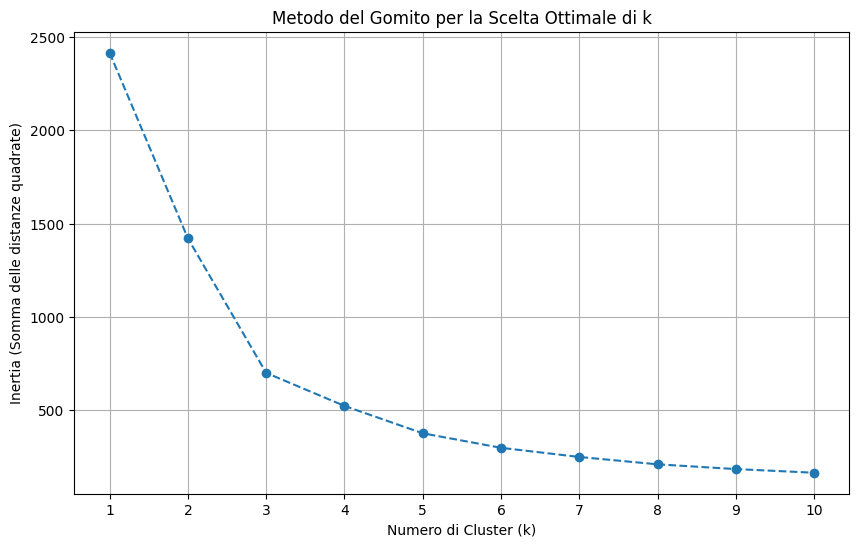

In [ ]:
# --- Step 5: Finding the Optimal k with the Elbow Method ---
# We calculate the inertia for a range of k values.
inertia = []
k_range = range(1, 11)
for k in k_range:
    # Initialize KMeans with the current k, a fixed random_state for reproducibility,
    # and n_init to explicitly set the number of initializations to run.
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pca_result)
    inertia.append(kmeans_temp.inertia_)

# Draw the elbow plot to visualize the result.
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k Selection')
plt.xticks(k_range)
plt.grid(True)
plt.show()


### **6: Executing K-Means and Visualizing Clusters**

Description:
Once an optimal `k` value has been chosen (based on the elbow plot, in this case `k=5)`, we execute the final K-Means algorithm. The algorithm will assign each point (each drug-disease association) to one of the 5 clusters. We add this information as a new column in our DataFrame. Finally, we create a scatter plot using the 2 PCA components as x and y coordinates, coloring each point according to its assigned cluster. This will provide a "map" of the therapeutic areas present in our data.


Sulla base del grafico, scegliamo un k ottimale di: 5
Clustering completato. Aggiunta la colonna 'Cluster' al DataFrame.


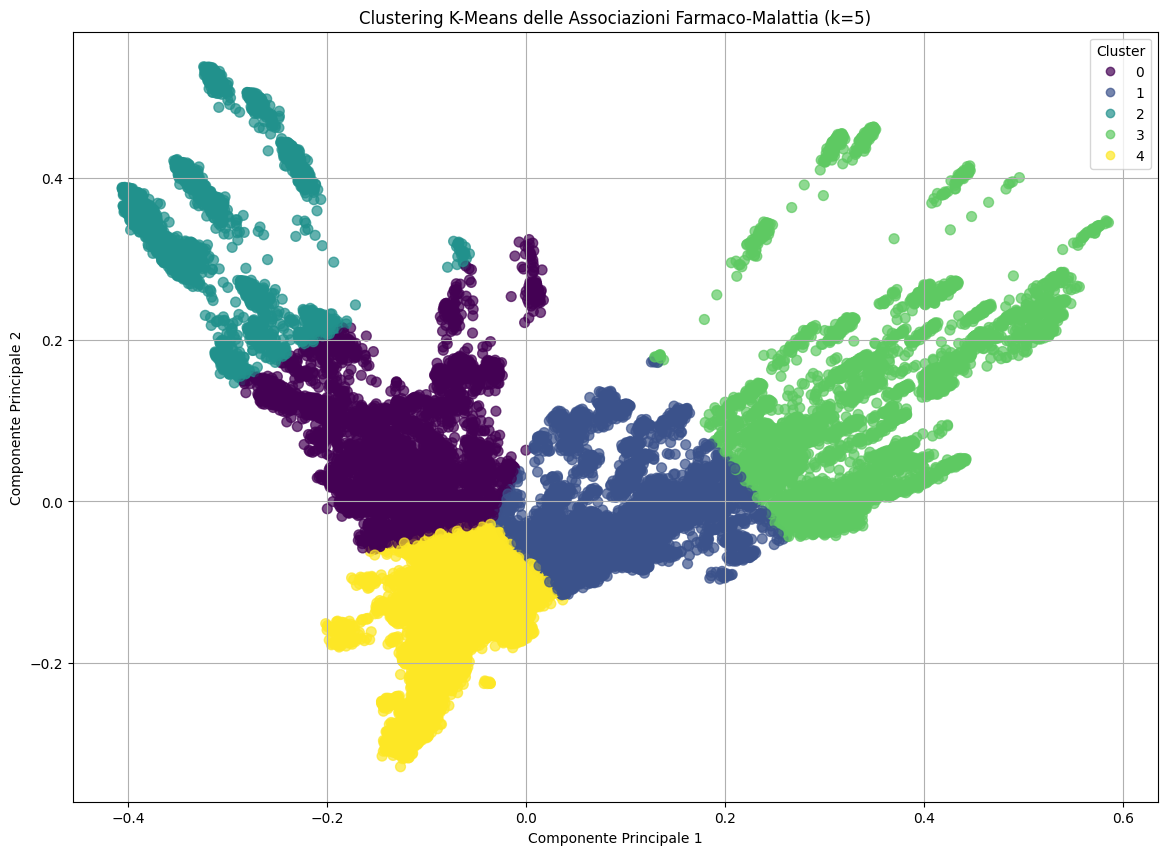

In [ ]:
# --- Step 6: K-Means Execution and Visualization ---
# From the previous plot, a good "elbow" appears to be at k=5.
optimal_k = 5
print(f"\nBased on the plot, we choose an optimal k of: {optimal_k}")

# Execute K-Means with the chosen k.
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
merged_df['Cluster'] = kmeans.fit_predict(pca_result)
print(f"Clustering completed. 'Cluster' column added to the DataFrame.")

# Create the final scatter plot.
plt.figure(figsize=(14, 10))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=merged_df['Cluster'], cmap='viridis', alpha=0.7, s=50)
plt.title(f'K-Means Clustering of Drug-Disease Associations (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)
plt.show()


### **7: Semantic Interpretation of Clusters**

Description:
A graph is useful, but to truly understand the "meaning" of each cluster, we need to inspect their content. In this cell, for each cluster found, we extract the most important keywords (those with the highest average TF-IDF score) and some examples of drugs and diseases that belong to it. This process transforms an abstract group of colored points into an interpretable concept, such as "Oncology Cluster," "Cardiology Cluster," and so on, validating the quality of our analysis.

In [ ]:
# --- Step 7: Semantic Interpretation of Clusters ---
# To interpret the clusters, we extract the most important keywords for each.
# These are the words that best define the "theme" of each group.
print("\n--- Semantic Analysis of Found Clusters ---")

# Get the cluster centers (in the original 5000-dimension space).
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(optimal_k):
    print(f"\n{'='*10} Cluster {i} {'='*10}")

    # Extract the most common drugs and diseases in this cluster for context.
    sample_drugs = merged_df[merged_df['Cluster'] == i]['DrugName'].value_counts().head(5).index.tolist()
    sample_diseases = merged_df[merged_df['Cluster'] == i]['DiseaseName'].value_counts().head(5).index.tolist()
    print(f"  Example Drugs: {', '.join(sample_drugs)}")
    print(f"  Example Diseases: {', '.join(sample_diseases)}")

    # Extract the keywords that define the cluster.
    top_words = [terms[ind] for ind in order_centroids[i, :15]]
    print(f"  Keywords: {', '.join(top_words)}")



--- Analisi Semantica dei Cluster Trovati ---

========== Cluster 0 ==========
  Esempi di Farmaci: Methotrexate, Doxorubicin, Valproic acid, Resveratrol, Fluorouracil
  Esempi di Malattie: Chemical and Drug Induced Liver Injury, Nausea, Seizures, Vomiting, Hypertension
  Parole Chiave: 100, 10

========== Cluster 1 ==========
  Esempi di Farmaci: Ethanol, Lithium cation, Nicotine, Caffeine, Morphine
  Esempi di Malattie: Seizures, Hypertension, Hypotension, Bradycardia, Tachycardia
  Parole Chiave: 10, 100

========== Cluster 2 ==========
  Esempi di Farmaci: Cyclophosphamide, Dexamethasone, Phenytoin, Prednisone, Carbamazepine
  Esempi di Malattie: Neutropenia, Fever, Chemical and Drug Induced Liver Injury, Kidney Diseases, Necrosis
  Parole Chiave: 100, 10

========== Cluster 3 ==========
  Esempi di Farmaci: Cocaine, Clozapine, Propranolol, Metamfetamine, Risperidone
  Esempi di Malattie: Hypotension, Hypertension, Seizures, Bradycardia, Depressive Disorder
  Parole Chiave: 10, 10